Выбор модели определения биологического возраста

In [1]:
from llamba_library.bioage_model import BioAgeModel
from txai_omics_3.models.tabular.widedeep.ft_transformer \
    import WDFTTransformerModel, FN_SHAP, FN_CHECKPOINT, TRAIN_DATA_PATH

fn_model = FN_CHECKPOINT
model = WDFTTransformerModel.load_from_checkpoint(fn_model)
bioage_model = BioAgeModel(model=model)

h:\Lobachevsky\llamba\llamba_env\Lib\site-packages\pytorch_lightning\utilities\migration\utils.py:55: The loaded checkpoint was produced with Lightning v2.4.0, which is newer than your current Lightning version: v2.1.4
h:\Lobachevsky\llamba\llamba_env\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [2]:
import pandas as pd
data = pd.read_excel(TRAIN_DATA_PATH)

Определение SHAP-значений

In [ ]:
import pandas as pd
import torch
from llamba_library.functions import get_shap_dict
import numpy as np
import inspect

feats = [
    'CXCL9',
    'CCL22',
    'IL6',
    'PDGFB',
    'CD40LG',
    'IL27',
    'VEGFA',
    'CSF1',
    'PDGFA',
    'CXCL10'
]

my_data = {'CXCL9': 2599.629474, 
           'CCL22': 820.306524, 
           'IL6': 0.846377, 
           'PDGFB': 13400.666359, 
           'CD40LG': 1853.847406, 
           'IL27': 1128.886982,
           'VEGFA': 153.574220,
           'CSF1': 239.627236,
           'PDGFA': 1005.844290,
           'CXCL10': 228.229829,
           'Age': 90.454972 }

data = pd.DataFrame(my_data, index=[0])

def predict_func(x):
    batch = {
        'all': torch.from_numpy(np.float32(x)),
        'continuous': torch.from_numpy(np.float32(x)),
        'categorical': torch.from_numpy(np.int32(x[:, []])),
    }
    return bioage_model.model(batch).cpu().detach().numpy()
shap_dict = get_shap_dict(FN_SHAP)

n = 3 # количество признаков с наибольшим вкладом
top_shap = bioage_model.get_top_shap(n, data, feats, shap_dict)

In [4]:
# Отсортированные в порядке увеличения вклада
print("SHAP values")
print(top_shap['values'])
print("Sorted data values")
print(top_shap['data'])
print("Sorted features")
print(top_shap['feats']) 

SHAP values
[-2.251804045522354, -2.2056395999008527, 0.16283428069578434, 0.33735915025232555, 0.743854391781005, 2.323208360528414, 3.2861902595668697, 4.112816668746404, 9.512898042106038, 11.9211211893435]
Sorted data values
[820.306524, 0.846377, 153.57422, 1128.886982, 228.229829, 239.627236, 13400.666359, 1005.84429, 1853.847406, 2599.629474]
Sorted features
['CCL22', 'IL6', 'VEGFA', 'IL27', 'CXCL10', 'CSF1', 'PDGFB', 'PDGFA', 'CD40LG', 'CXCL9']


Визуализация вклада отдельных признаков в оценку биологического возраста

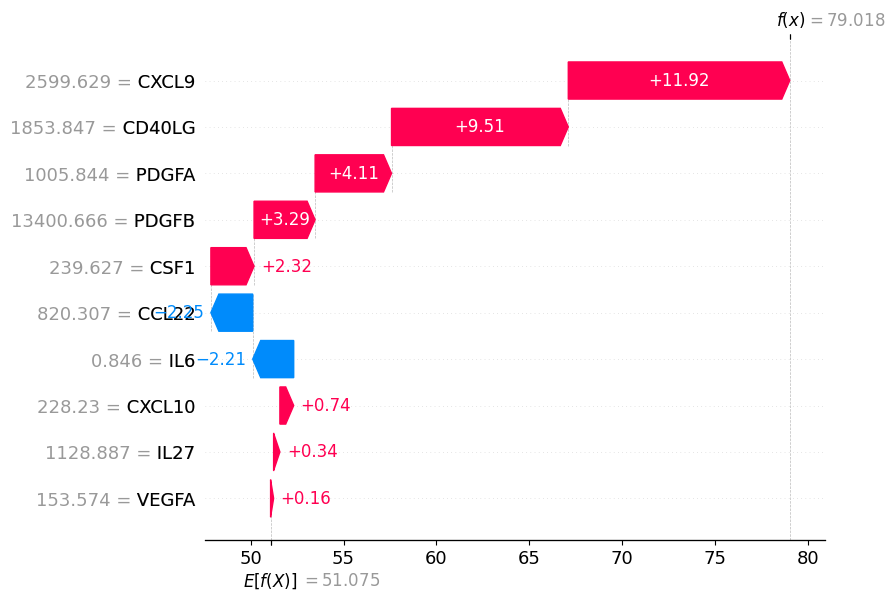

In [5]:
import llamba_library.plots as bplt
bplt.shap_plot(shap_dict=top_shap)